In [24]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('SampleSuperstore.csv')

In [9]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [16]:
data['Block_id']=data.groupby(['City','State','Region']).ngroup()

In [34]:
dd=pd.merge(data,pd.DataFrame(data.groupby('Block_id')['Profit'].apply(np.sum)).reset_index(),on='Block_id',how='inner')

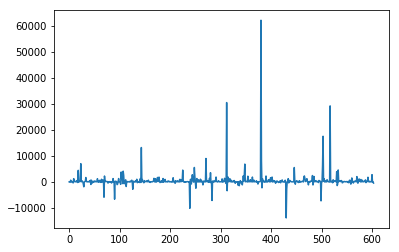

In [51]:
pd.DataFrame(data.groupby('Block_id')['Profit'].apply(np.sum)).reset_index()['Profit'].plot()


In [58]:
np.percentile(pd.DataFrame(data.groupby('Block_id')['Profit'].apply(np.sum)).reset_index()['Profit'],23)

0.7512359999999981

23 % of areas (Block_id) are suffering from loss

##### Weak areas

In [66]:
temp=pd.DataFrame(data.groupby('Block_id')['Profit'].apply(np.sum)).reset_index()
print('Weak areas:\n')
for i in temp[temp['Profit']< 0]['Block_id'].values:
    print(data[data['Block_id']==i][['City','State','Region']].values[0])


Weak areas:

['Abilene' 'Texas' 'Central']
['Akron' 'Ohio' 'East']
['Allen' 'Texas' 'Central']
['Allentown' 'Pennsylvania' 'East']
['Altoona' 'Pennsylvania' 'East']
['Amarillo' 'Texas' 'Central']
['Arlington' 'Texas' 'Central']
['Aurora' 'Colorado' 'West']
['Aurora' 'Illinois' 'Central']
['Austin' 'Texas' 'Central']
['Bethlehem' 'Pennsylvania' 'East']
['Bloomington' 'Illinois' 'Central']
['Boca Raton' 'Florida' 'South']
['Bolingbrook' 'Illinois' 'Central']
['Bristol' 'Tennessee' 'South']
['Bryan' 'Texas' 'Central']
['Buffalo Grove' 'Illinois' 'Central']
['Burlington' 'North Carolina' 'South']
['Carol Stream' 'Illinois' 'Central']
['Carrollton' 'Texas' 'Central']
['Champaign' 'Illinois' 'Central']
['Charlotte' 'North Carolina' 'South']
['Chicago' 'Illinois' 'Central']
['Clarksville' 'Tennessee' 'South']
['Cleveland' 'Ohio' 'East']
['College Station' 'Texas' 'Central']
['Colorado Springs' 'Colorado' 'West']
['Columbia' 'Tennessee' 'South']
['Columbus' 'Ohio' 'East']
['Commerce City' 'Col